In [246]:
import numpy as np

## Hata fonksiyonu

In [247]:
def hinge_loss_deneme(y, ypred):
    if y == 1:
        if ypred >= 1:
            return 0
        else:
            return y - ypred
    else:
        if ypred <= -1:
            return 0
        else:
            return ypred - y

In [248]:
y = [1,1,1,-1,1]
decision_function_output = [10, -10, 2, 4, -1]

In [249]:
hinge_loss_deneme(-1, 0)

1

In [250]:
hinge_loss_deneme(1, 0)

1

## SVM

In [251]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [252]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=2, random_state=42)

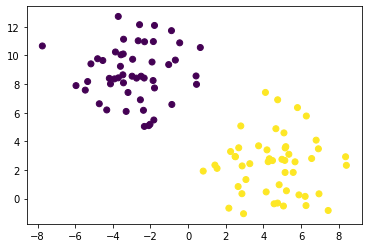

In [253]:
plt.scatter(*X.T, c=y)

In [254]:
def decision_func(X, b0, b1, b2):
    return b0 + b1 * X.T[0] + b2 * X.T[1]

In [255]:
t = decision_func(X, 0,-1,1)

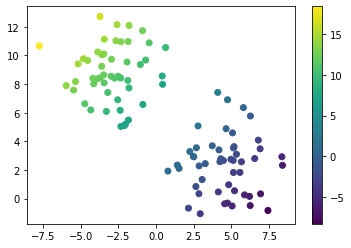

In [256]:
plt.scatter(*X.T, c=t)
plt.colorbar()

In [257]:
def SVM(X):
    
    ypred = X.copy()
    
    ypred[ypred > 0] = 1
    ypred[ypred <= 0] = 0
    
    return ypred.astype(int)

In [258]:
SVM(t)

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

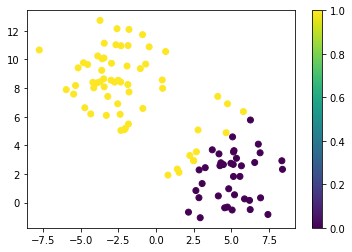

In [259]:
plt.scatter(*X.T, c=SVM(t))
plt.colorbar()

In [260]:
t2 = decision_func(X, -5,-1,1)

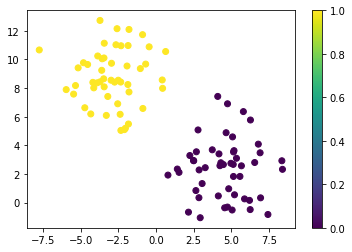

In [261]:
plt.scatter(*X.T, c=SVM(t2))
plt.colorbar()

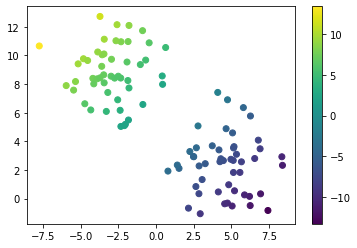

In [262]:
plt.scatter(*X.T, c=t-5)
plt.colorbar()

In [263]:
t3 = decision_func(X, 50,10,-10)

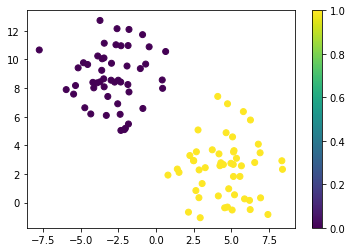

In [264]:
plt.scatter(*X.T, c=SVM(t3))
plt.colorbar()

In [265]:
def hinge_loss(y, decision):
    
    y = np.array(y).copy()
    decision = np.array(decision)
    
    y[y == 0] = -1
        
    loss = 1 - y * decision
    loss[loss < 0] = 0
    
    return loss

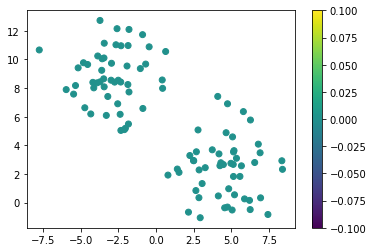

In [266]:
plt.scatter(*X.T, c=hinge_loss(y, t3))
plt.colorbar()

In [267]:
t2 = decision_func(X, 0.5,0.1,-0.1)

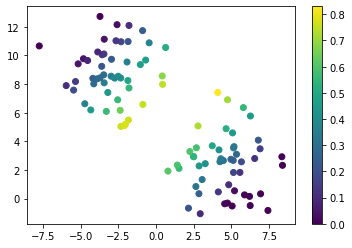

In [268]:
plt.scatter(*X.T, c=hinge_loss(y, t2))
plt.colorbar()

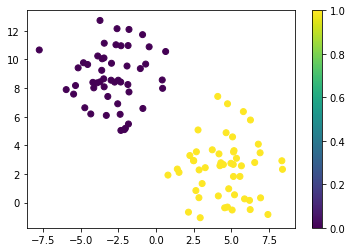

In [269]:
plt.scatter(*X.T, c=SVM(t2))
plt.colorbar()

In [270]:
C = 10 

## objective function

In [271]:
C * hinge_loss(y, t2).sum() + (np.array((0.5,0.1,-0.1))**2).sum()

322.0244315798973

In [272]:
C * hinge_loss(y, t3).sum() + (np.array((50,10,-10))**2).sum()

2700.0

In [273]:
b0, b1, b2 = 5,1,-1

In [274]:
C * hinge_loss(y, decision_func(X, b0, b1, b2)).sum() + (np.array((b0, b1, b2))**2).sum()

27.0

In [275]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [276]:
xi, yi = [np.linspace(X.T[i].min(), X.T[i].max(), 100) for i in [0, 1]]
xx, yy = np.meshgrid(xi, yi)

In [277]:
from ipywidgets import interact

In [278]:
@interact
def svv(b0=(-5,5,0.1), b1=(-10,10,0.1), b2=(-10,10,0.1), eC=(-5,5,1)):
    C = 10**eC  # C = 10^(user parameter)
    t = decision_func(X, b0, b1, b2)
    mesh = np.array([xx, yy]).T
    meshy = SVM(decision_func(mesh, b0, b1, b2))
    z = C * hinge_loss(y, t).sum() + (np.array((b0, b1, b2))**2).sum()
    print(z)
    plt.scatter(*X.T, c=hinge_loss(y, t))
    plt.colorbar()
    plt.contourf(xx, yy, meshy.reshape(xx.shape), alpha=0.1)

interactive(children=(FloatSlider(value=0.0, description='b0', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

In [279]:
from sklearn.svm import LinearSVC

In [280]:
md = LinearSVC(C=1, loss='hinge', dual=True).fit(X, y)

In [281]:
md.score(X, y)

1.0

In [282]:
md.coef_

array([[ 1.75772881, -1.03667812]])

In [283]:
md.intercept_

array([0.00766741])

In [66]:
md.intercept_scaling

1

In [284]:
from sklearn.datasets import make_circles

In [285]:
X, y = make_circles(n_samples=20, noise=0.1, factor=0.1, random_state=42)

## Euclidean Kernel with Single Reference Point

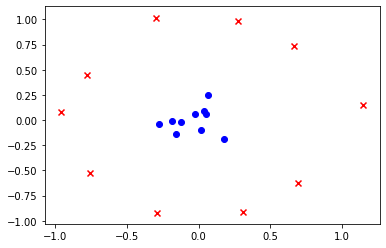

In [290]:
plt.scatter(*X[y==0].T, marker='x', color='red')
plt.scatter(*X[y==1].T, marker='o', color='blue')

In [299]:
def find_distance(X):
    return ((pd.DataFrame(X) - [0, 0])**2).sum(axis=1)**0.5

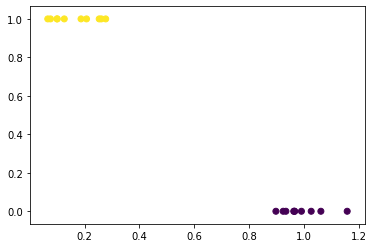

In [306]:
distance = find_distance(X)
plt.scatter(distance, y, c=y)

In [308]:
distance

0     1.156520
1     0.277002
2     0.126173
3     0.989867
4     0.965468
5     0.961908
6     0.075971
7     1.060686
8     0.099862
9     0.207221
10    0.261150
11    1.025402
12    0.933241
13    0.100409
14    0.896878
15    0.187162
16    0.963852
17    0.253398
18    0.066025
19    0.923324
dtype: float64

In [296]:
X[:4]

array([[ 1.14623781,  0.1538715 ],
       [-0.27481228, -0.03476153],
       [-0.1251044 , -0.01638671],
       [ 0.66138403,  0.73648335]])

In [297]:
distance[:4]

0    1.156520
1    0.277002
2    0.126173
3    0.989867
dtype: float64

In [295]:
xi, yi = [np.linspace(X.T[i].min(), X.T[i].max(), 100) for i in [0, 1]]
xx, yy = np.meshgrid(xi, yi)

In [302]:
mesh = np.array([xx, yy]).T

In [305]:
@interact
def svkernel(b0=(-5,5,0.1), b1=(-10,10,0.1), eC=(-5,5,1)):
    distance = ((pd.DataFrame(X) - [0, 0])**2).sum(axis=1)**0.5
    C = 10**eC  # C = 10^(user parameter)
    t = b0 + b1 * distance
    mesh = np.array([xx.ravel(), yy.ravel()]).T
    mesh_distance = find_distance(mesh)
    meshy = SVM(b0 + b1 * mesh_distance)
    z = C * hinge_loss(y, t).sum() + (np.array((b0, b1))**2).sum()
    print(z)
    plt.scatter(*X.T, c=hinge_loss(y, t))
    plt.colorbar()
    plt.contourf(xx, yy, meshy.values.reshape(xx.shape), alpha=0.1)

interactive(children=(FloatSlider(value=0.0, description='b0', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

## Euclidean Kernel

In [321]:
bilesen_bazinda_birbirinden_fark = X.reshape(-1, X.shape[1], 1) - X.T.reshape(1, X.shape[1], -1)
bilesen_bazinda_birbirinden_fark.shape

(20, 2, 20)

In [323]:
kare_bilesenlerin_toplami = (bilesen_bazinda_birbirinden_fark**2).sum(axis=1)

In [324]:
mesafe = kare_bilesenlerin_toplami**0.5

In [334]:
@interact
def svkernel(sigma=(0.01,5,0.01)):

    mesh = np.array([xx.ravel(), yy.ravel()]).T
    mesafe = ((mesh - 0)**2).sum(axis=1)**0.5
    e_terimi = - mesafe**2 / (2 * sigma**2)
    benzerlik = np.exp(e_terimi)
    
    
    plt.contourf(xx, yy, benzerlik.reshape(xx.shape), cmap='jet', levels=50, vmin=0, vmax=1)
    plt.colorbar()

interactive(children=(FloatSlider(value=2.5, description='sigma', max=5.0, min=0.01, step=0.01), Output()), _d…

## RBF Kernel

In [326]:
pd.DataFrame(mesafe).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000,1.434,1.283,0.758,1.360,2.106,1.099,1.684,1.157,1.334,1.087,1.209,0.906,1.112,1.945,1.343,1.794,1.029,1.174,2.024
1,1.434,0.000,0.151,1.213,1.055,0.694,0.339,1.053,0.299,0.157,0.445,1.160,1.133,0.337,0.697,0.091,0.884,0.473,0.268,0.689
2,1.283,0.151,0.000,1.089,0.997,0.839,0.191,1.049,0.164,0.124,0.329,1.081,1.019,0.195,0.800,0.062,0.918,0.343,0.127,0.813
3,0.758,1.213,1.089,0.000,1.690,1.746,0.914,1.001,1.055,1.196,0.768,0.464,1.365,0.897,1.467,1.130,1.910,1.041,0.962,1.900
4,1.360,1.055,0.997,1.690,0.000,1.612,1.004,2.026,0.867,0.906,1.194,1.904,0.479,1.045,1.742,1.032,0.598,0.744,1.031,1.138
5,2.106,0.694,0.839,1.746,1.612,0.000,1.010,1.143,0.992,0.832,1.036,1.528,1.795,0.995,0.408,0.777,1.203,1.164,0.934,0.636
6,1.099,0.339,0.191,0.914,1.004,1.010,0.000,1.024,0.158,0.283,0.198,0.959,0.936,0.041,0.917,0.247,1.033,0.269,0.076,0.998
7,1.684,1.053,1.049,1.001,2.026,1.143,1.024,0.000,1.160,1.163,0.846,0.572,1.921,0.983,0.743,1.033,1.936,1.291,0.995,1.607
8,1.157,0.299,0.164,1.055,0.867,0.992,0.158,1.160,0.000,0.177,0.355,1.117,0.857,0.193,0.964,0.222,0.876,0.179,0.165,0.886
9,1.334,0.157,0.124,1.196,0.906,0.832,0.283,1.163,0.177,0.000,0.448,1.204,0.978,0.300,0.853,0.131,0.794,0.334,0.238,0.718


In [335]:
def rbf(mesafe, sigma):
    e = (mesafe**2) / (2 * sigma ** 2)
    similarity = np.exp(-e)
    return similarity
    

In [336]:
similarity = rbf(mesafe, sigma=1.0)

In [343]:
@interact(sigma=(0.1,5,0.1))
def similarit_i(sigma=(1.0)):
    similarity = rbf(mesafe, sigma=sigma)
    sns.heatmap(pd.DataFrame(similarity).round(3), vmin=0, vmax=1, cmap='jet')

interactive(children=(FloatSlider(value=1.0, description='sigma', max=5.0, min=0.1), Output()), _dom_classes=(…

In [316]:
a = np.random.randn(3,1)
b = np.random.randn(1, 4)

In [317]:
a

array([[-0.27467404],
       [-0.59269401],
       [-0.89391852]])

In [318]:
b

array([[ 1.04010027,  0.04337671, -0.38695206,  2.03487619]])

In [319]:
a - b

array([[-1.31477432, -0.31805076,  0.11227801, -2.30955024],
       [-1.63279429, -0.63607073, -0.20574196, -2.62757021],
       [-1.9340188 , -0.93729524, -0.50696646, -2.92879471]])

In [375]:
def hinge_derivative(decision, y):
    loss = hinge_loss(y, decision)
    loss[loss>0] = 1*(-y)
    derivative = loss
    return derivative

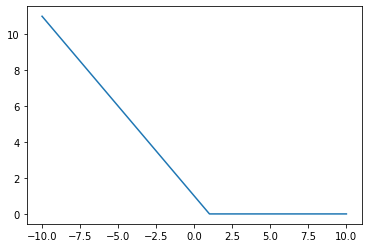

In [381]:
plt.plot(fff, hinge_loss(1, fff))

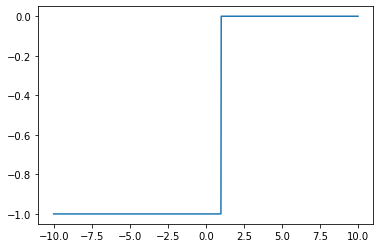

In [382]:
plt.plot(fff, hinge_derivative(fff, 1))

In [383]:
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [384]:
z = -y

In [385]:
z[0] = 14

In [386]:
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

## Creating a synthetic dataset

In [84]:
import numpy as np

In [89]:
def sigmoid(logit):
    logit = np.clip(logit, -1e2, 1e2)
    proba = 1 / (1 + np.exp(-logit))
    return proba

def odd(p):
    return p / (1 - p)

def logit(p):
    return np.log(odd(p))

def generate_logit(xx, yy):
    logits = (xx**2 - 2*xx + yy**3 + np.log(xx + 70) - 6 * xx * yy) / 3
    return logits

def generate_probas(xx, yy):
    probas = sigmoid(generate_logit(xx, yy))
    return probas

In [90]:
x_ = np.linspace(-9, 9, 1000)
y_ = np.linspace(-9, 9, 1000)

In [91]:
logit(0.3)

-0.8472978603872036

In [92]:
sigmoid(-0.8472978603872036)

0.30000000000000004

In [93]:
xx, yy = np.meshgrid(x_, y_)

In [94]:
zz = xx**2 - 2*xx + yy**3 + np.log(xx + 70) - 6 * xx * yy

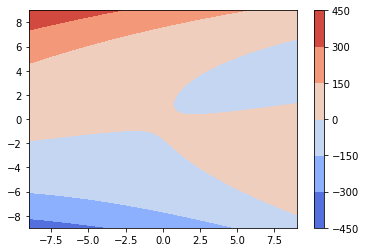

In [95]:
plt.contourf(xx, yy, generate_logit(xx, yy), cmap='coolwarm')
plt.colorbar()

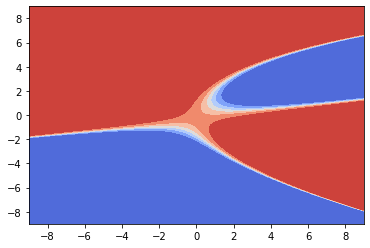

In [96]:
plt.contourf(xx, yy, generate_probas(xx, yy), cmap='coolwarm')

## Generating Dataset

In [105]:
X = np.random.randn(90, 2) * 3

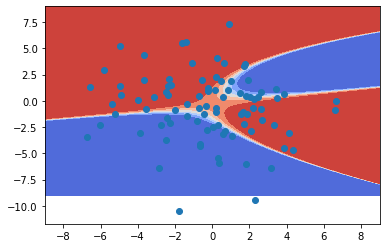

In [106]:
plt.contourf(xx, yy, generate_probas(xx, yy), cmap='coolwarm')
plt.scatter(*X.T)

In [107]:
y_probas = generate_probas(*X.T)

In [108]:
y = np.array(
    [np.random.choice([0, 1], p=[1 - proba, proba])
     for proba in y_probas]
)

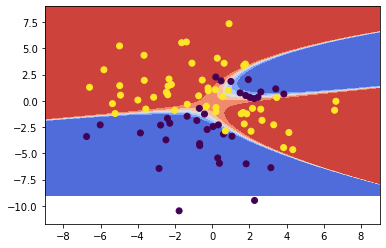

In [109]:
plt.contourf(xx, yy, generate_probas(xx, yy), cmap='coolwarm')
plt.scatter(*X.T, c=y)

In [112]:
from sklearn.datasets import make_circles

In [161]:
X, y = make_circles(noise=0.1, factor=0.3)

In [162]:
X = X[y.argsort()]
y = y[y.argsort()]

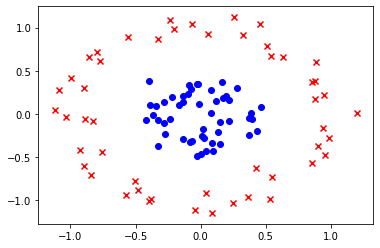

In [163]:
plt.scatter(*X[y==0].T, marker='x', color='red')
plt.scatter(*X[y==1].T, marker='o', color='blue')

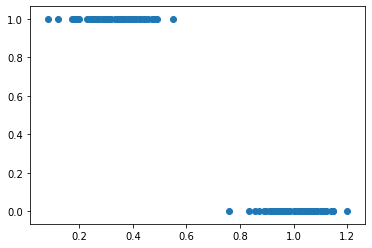

In [245]:
distance_to_center = ((X**2).sum(axis=1)**0.5)
plt.scatter(distance_to_center, y)

In [164]:
import seaborn as sns

In [236]:
sigma = 1

In [237]:
dist = ((X.reshape(-1,2,1) - X.T.reshape(1,2,-1))**2).sum(axis=1)**0.5

In [238]:
dist.shape

(100, 100)

In [240]:
rbf = np.exp(-(dist**2 / sigma**2))

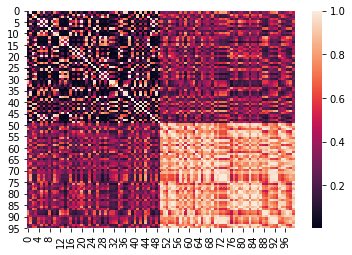

In [241]:
sns.heatmap(rbf)

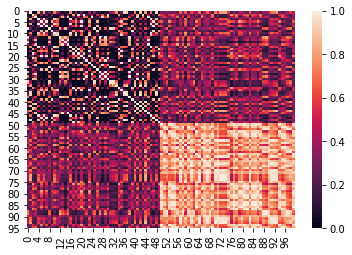

In [242]:
sns.heatmap(rbf_kernel(X, gamma=1), vmin=0, vmax=1)

In [214]:
kernel = np.exp(-(((X@X.T)**2)/2/sigma**2))

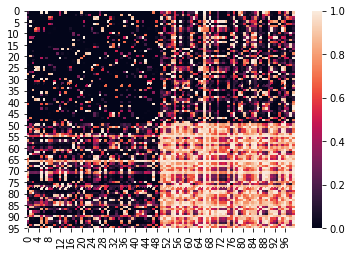

In [215]:
sns.heatmap(kernel, vmin=0, vmax=1)

In [168]:
from sklearn.metrics.pairwise import sigmoid_kernel, rbf_kernel